Part 1

In [ ]:

from google.colab import files
my_file = files.upload()

Saving titanic.csv to titanic.csv


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
import pandas as pd

# Load the Titanic dataset
titanic_df = pd.read_csv('titanic.csv')


In [ ]:
# Display the first few rows of the dataset
print(titanic_df.head())


   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  Parch  \
0                            Braund, Mr. Owen Harris    male  22.0      0   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      0   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      0   
4                           Allen, Mr. William Henry    male  35.0      0   

      Fare Embarked  
0   7.2500        S  
1  71.2833        C  
2   7.9250        S  
3  53.1000        S  
4   8.0500        S  


In [ ]:
# Calculate basic statistics for numeric columns
numeric_stats = titanic_df.describe()
print(numeric_stats)

# Visualization of the statistics can be done using a bar chart or box plot.


       PassengerId    Survived      Pclass         Age       Parch        Fare
count   891.000000  891.000000  891.000000  714.000000  891.000000  891.000000
mean    446.000000    0.383838    2.308642   29.699118    0.381594   32.204208
std     257.353842    0.486592    0.836071   14.526497    0.806057   49.693429
min       1.000000    0.000000    1.000000    0.420000    0.000000    0.000000
25%     223.500000    0.000000    2.000000   20.125000    0.000000    7.910400
50%     446.000000    0.000000    3.000000   28.000000    0.000000   14.454200
75%     668.500000    1.000000    3.000000   38.000000    0.000000   31.000000
max     891.000000    1.000000    3.000000   80.000000    6.000000  512.329200


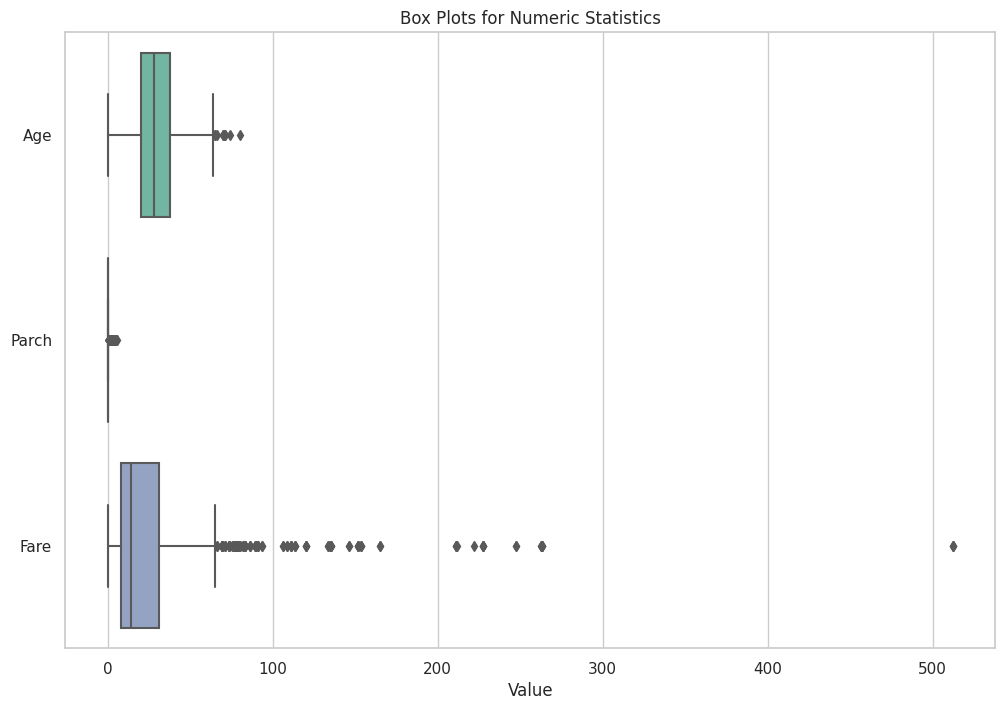

In [ ]:
columns_for_boxplot = ["Age", "Parch", "Fare"]

# Creating box plots using Seaborn
plt.figure(figsize=(12, 8))
sns.set(style="whitegrid")  # Set the style of the grid

# Creating box plots for each numerical column
sns.boxplot(data=titanic_df[columns_for_boxplot], orient="h", palette="Set2")
plt.title("Box Plots for Numeric Statistics")
plt.xlabel("Value")
plt.show()

Part 2

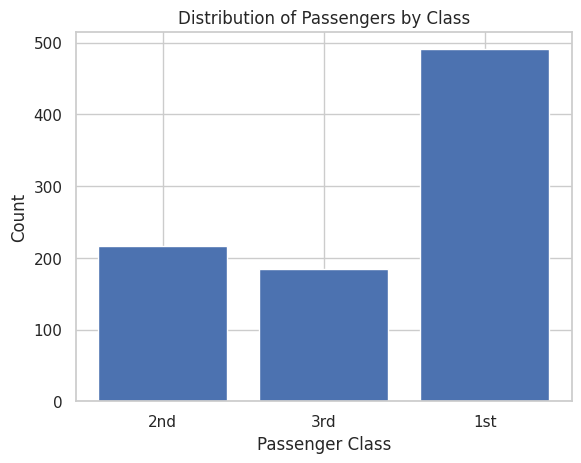

In [ ]:
import matplotlib.pyplot as plt

# Count passengers in each class
class_counts = titanic_df['Pclass'].value_counts()

# Create a bar chart
plt.bar(class_counts.index, class_counts.values)
plt.xlabel('Passenger Class')
plt.ylabel('Count')
plt.title('Distribution of Passengers by Class')
plt.xticks(class_counts.index, ['1st', '2nd', '3rd'])
plt.show()


Observation: The majority of passengers were in the 3rd class, followed by the 1st class, and the 2nd class had the fewest passengers.

Part 3

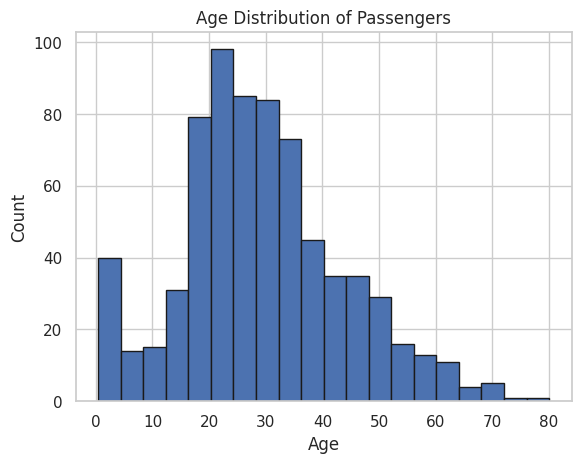

In [ ]:
# Create a histogram
plt.hist(titanic_df['Age'], bins=20, edgecolor='k')
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Age Distribution of Passengers')
plt.show()


Observation: The age distribution appears to be slightly right-skewed, with a concentration of passengers in the 20-30 age range.

Part 4

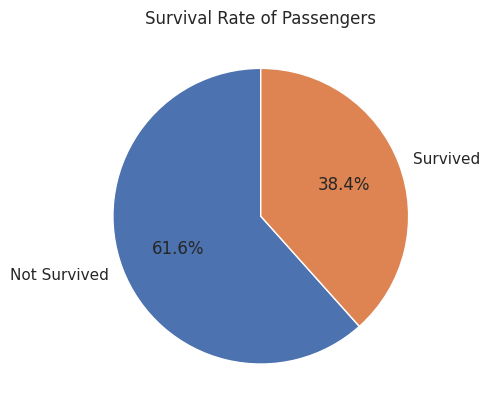

In [ ]:
# Calculate survival rate
survival_counts = titanic_df['Survived'].value_counts()
survival_rate = survival_counts[1] / len(titanic_df) * 100

# Create a pie chart
labels = ['Not Survived', 'Survived']
sizes = [survival_counts[0], survival_counts[1]]
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
plt.title('Survival Rate of Passengers')
plt.show()


Observation: Approximately 38% of passengers survived.

Part 5

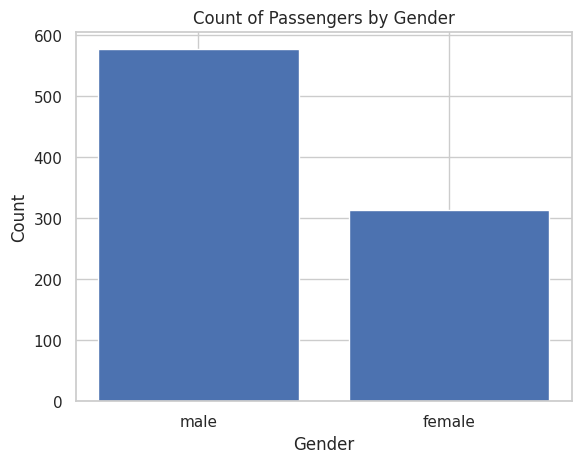

In [ ]:
# Count passengers by gender
gender_counts = titanic_df['Sex'].value_counts()

# Create a bar chart
plt.bar(gender_counts.index, gender_counts.values)
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Count of Passengers by Gender')
plt.show()


Observation: There are more male passengers than female passengers.

Part 6

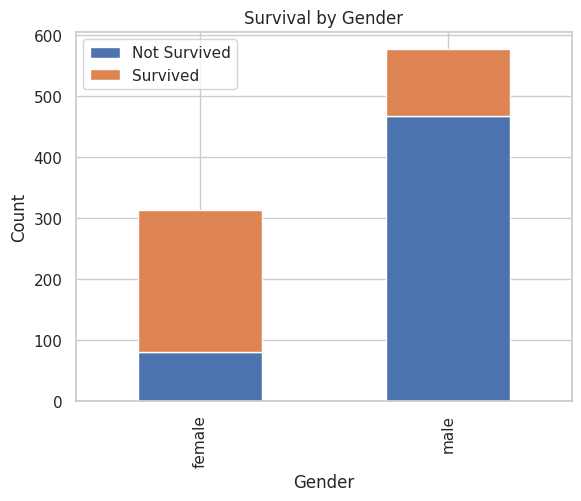

In [ ]:
# Calculate survival counts by gender
survival_by_gender = titanic_df.groupby(['Sex', 'Survived']).size().unstack()

# Create a stacked bar chart
survival_by_gender.plot(kind='bar', stacked=True)
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Survival by Gender')
plt.legend(['Not Survived', 'Survived'])
plt.show()


Observation: More females survived compared to males.

Part 7

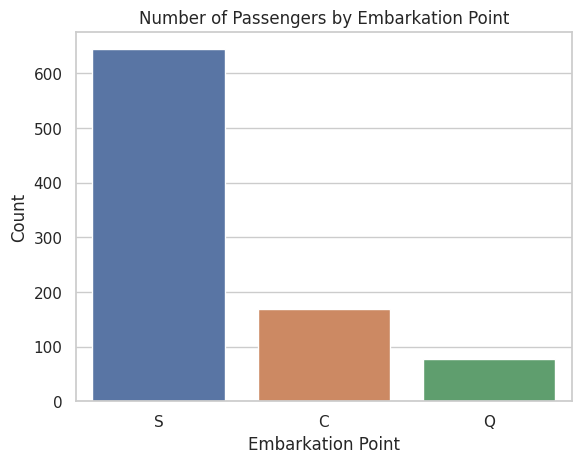

In [ ]:
# Create a count plot
sns.countplot(data=titanic_df, x='Embarked')
plt.xlabel('Embarkation Point')
plt.ylabel('Count')
plt.title('Number of Passengers by Embarkation Point')
plt.show()


Observation: Most passengers embarked from Southampton (S), followed by Cherbourg (C), and Queenstown (Q).



Part 8

In [ ]:
titanic_df['Parch']

0      0
1      0
2      0
3      0
4      0
      ..
886    0
887    0
888    2
889    0
890    0
Name: Parch, Length: 891, dtype: int64

Observation: There are some outliers in family size, with most passengers having smaller families.

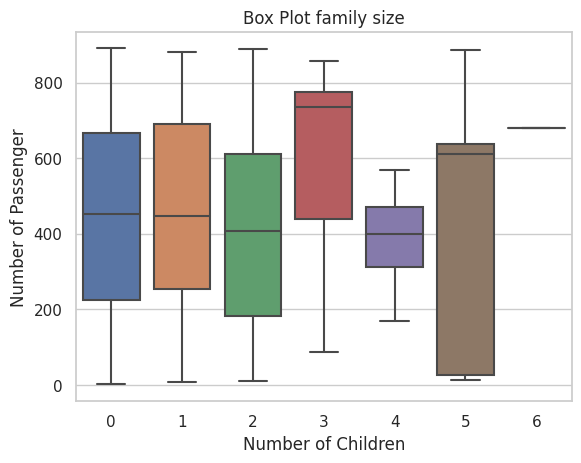

In [ ]:
## WRONG - GIVING MARKS TO EVERYONE
sns.boxplot(data = titanic_df, x = "Parch", y = "PassengerId")
plt.title("Box Plot family size")
plt.xlabel("Number of Children")
plt.ylabel("Number of Passenger")
plt.show()

Part 9

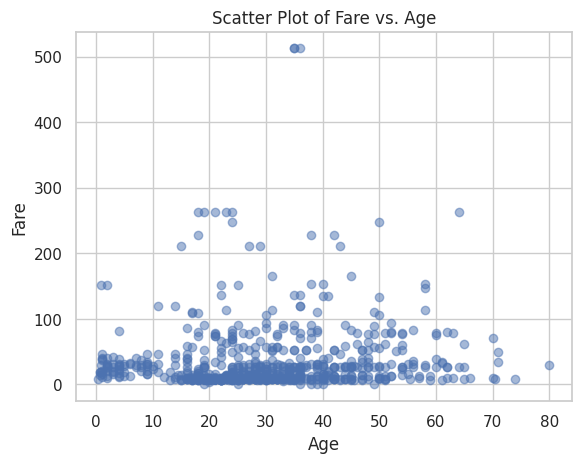

In [ ]:
# Create a scatter plot
plt.scatter(titanic_df['Age'], titanic_df['Fare'], alpha=0.5)
plt.xlabel('Age')
plt.ylabel('Fare')
plt.title('Scatter Plot of Fare vs. Age')
plt.show()


Observation: There doesn't appear to be a strong correlation between fare and age.

Part 10

To create a multi-bar chart (grouped bar chart) showing the survival rate by passenger class and age group, you can use similar code as in Part 8, but categorize passengers into age groups and compare survival rates across classes.

# Question 2

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Corona_NLP.csv to Corona_NLP.csv


In [ ]:
import numpy as np
import pandas as pd

import re
import string

import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import TweetTokenizer


nltk.download('stopwords')

def cleaning_with_re(tweet):
    try:
      # remove hyperlinks
      tweet = re.sub(r'https?://(?:www\.[^\s\n\r]+|[^\s\n\r]+)', '', tweet)

      # remove hashtag (#)
      tweet = re.sub(r'#', '', tweet)

      #replaces newline (\n) and carriage return (\r) characters in a tweet with an empty string
      tweet = re.sub(r'[\n\r]', '', tweet)
    except:
      print(tweet)

    return tweet

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
def tokenizing(tweet):

    stopwords_english = stopwords.words('english')
    tokenizer = TweetTokenizer(preserve_case=False, strip_handles=True,reduce_len=True)
    new_tweet = tokenizer.tokenize(tweet)

    clean_tweet=[]

    for word in new_tweet: # Going through every word in tokens list
        if (word not in stopwords_english and word not in string.punctuation):  # remove punctuation and stopwords
            clean_tweet.append(word)

    return clean_tweet


In [ ]:
def stemming(tweet):
    # Instantiate stemming class
    stemmer = PorterStemmer()

    # Create an empty list to store the stems
    stemmed_tweets = []

    for word in tweet:
        stem_word = stemmer.stem(word)  # stemming word
        stemmed_tweets.append(stem_word)  # append to the list

    return stemmed_tweets

In [ ]:
def make_str(tweet):
    new = ""
    for item in tweet:
        new += (item + " ")
    return new

In [ ]:
def preprocessing(tweet):
    tweet=cleaning_with_re(tweet)
    tweet=tokenizing(tweet)
    tweet=stemming(tweet)
    tweet = make_str(tweet)

    return tweet

In [ ]:
df = pd.read_csv("/content/Corona_NLP.csv")

In [ ]:
df.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,3799.0,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral
1,3800.0,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive
2,3801.0,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive
3,3802.0,48754,NaN,16-03-2020,My food stock is not the only one which is emp...,Positive
4,3803.0,48755,NaN,16-03-2020,"Me, ready to go at supermarket during the #COV...",Extremely Negative


In [ ]:
# 2.1.2
df.tail(10)

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
44948,3789.0,48741,Pakistan,16-03-2020,You never eaten the pigs cat dog or food from ...,Neutral
44949,3790.0,48742,"California, USA",16-03-2020,@calebmealer @thebradfordfile @realDonaldTrump...,Extremely Positive
44950,3791.0,48743,"Cincinnati, Ohio",16-03-2020,"Even though the Law Library is closed, ALL sub...",Positive
44951,3792.0,48744,Washington D.C.,16-03-2020,"With Gov Hogan's announcement that all bars, r...",Extremely Negative
44952,3793.0,48745,Washington D.C.,16-03-2020,"@RicePolitics @MDCounties Craig, will you call...",Negative
44953,3794.0,48746,Israel ??,16-03-2020,Meanwhile In A Supermarket in Israel -- People...,Positive
44954,3795.0,48747,"Farmington, NM",16-03-2020,Did you panic buy a lot of non-perishable item...,Negative
44955,3796.0,48748,"Haverford, PA",16-03-2020,Asst Prof of Economics @cconces was on @NBCPhi...,Neutral
44956,3797.0,48749,NaN,16-03-2020,Gov need to do somethings instead of biar je r...,Extremely Negative
44957,3798.0,48750,"Arlington, Virginia",16-03-2020,I and @ForestandPaper members are committed to...,Extremely Positive


In [ ]:
# 2.2.1
df.duplicated().sum()

1

In [ ]:
print(df[df.duplicated()])

       UserName ScreenName Location TweetAt OriginalTweet Sentiment
39207       NaN    Neutral      NaN     NaN           NaN       NaN


In [ ]:
# 2.2.1
df = df.drop_duplicates()

In [ ]:
#2.2.2a
# Get unique values and their frequencies from the 'Location' column
unique_values = df['Location'].value_counts()

# Print unique values and their frequencies
print("Unique values and their frequencies in the 'Location' column:")
print(unique_values)

Unique values and their frequencies in the 'Location' column:
United States             603
London, England           568
London                    565
New York, NY              429
Washington, DC            411
                         ... 
New York State of Mind      1
Bury, England               1
Brent, London               1
Wall, NJ                    1
Haverford, PA               1
Name: Location, Length: 13127, dtype: int64


In [ ]:
# 2.2.2b
unique_values.sort_values(ascending=False)

United States             603
London, England           568
London                    565
New York, NY              429
Washington, DC            411
                         ... 
Newry and Mourne            1
Brenham, TX                 1
Baton Rouge, Louisiana      1
Grounded                    1
Haverford, PA               1
Name: Location, Length: 13127, dtype: int64

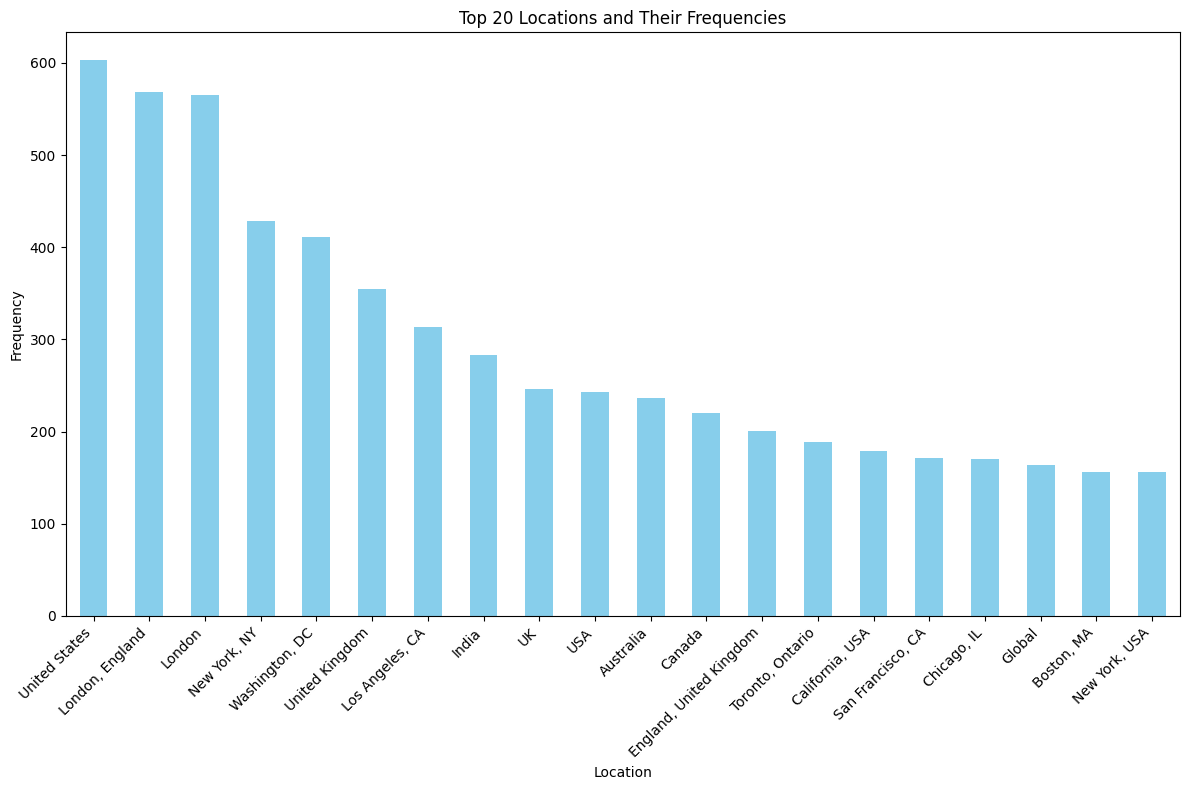

In [ ]:
# 2.2.2c
top_locations = unique_values.head(20)
plt.figure(figsize=(12, 8))
top_locations.plot(kind='bar', color='skyblue')
plt.xlabel('Location')
plt.ylabel('Frequency')
plt.title('Top 20 Locations and Their Frequencies')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

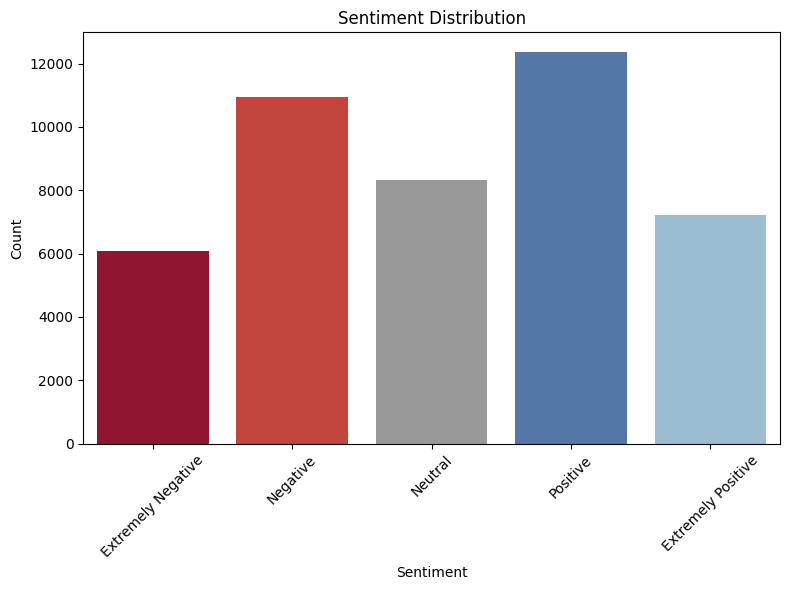

In [ ]:
# 2.2.3
# Define an appropriate color palette for the sentiment categories
colors = {"Negative": "#d73027", "Extremely Negative": "#a50026",
          "Positive": "#4575b4", "Extremely Positive": "#91bfdb", "Neutral": "#999999"}


# Visualize the distribution of Sentiment using a countplot with the specified color palette
plt.figure(figsize=(8, 6))
sns.countplot(x='Sentiment', data=df, palette=colors, order=["Extremely Negative", "Negative", "Neutral", "Positive", "Extremely Positive"])
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.title('Sentiment Distribution')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
# 2.2.4
df['Sentiment'] = df['Sentiment'].replace({'Extremely Negative': 'Negative', 'Extremely Positive': 'Positive'})

In [ ]:
df.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,3799.0,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral
1,3800.0,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive
2,3801.0,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive
3,3802.0,48754,NaN,16-03-2020,My food stock is not the only one which is emp...,Positive
4,3803.0,48755,NaN,16-03-2020,"Me, ready to go at supermarket during the #COV...",Negative


In [ ]:
df = df.dropna(subset=['OriginalTweet', 'Sentiment'])

In [ ]:
count_nan = df.isna().sum()

In [ ]:
count_nan

UserName            0
ScreenName          0
Location         9424
TweetAt             0
OriginalTweet       0
Sentiment           0
dtype: int64

In [ ]:
df["cleaned_tweet"] = df['OriginalTweet'].apply(preprocessing)

In [ ]:
df.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment,cleaned_tweet
0,3799.0,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral,
1,3800.0,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive,advic talk neighbour famili exchang phone numb...
2,3801.0,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive,coronaviru australia woolworth give elderli di...
3,3802.0,48754,NaN,16-03-2020,My food stock is not the only one which is emp...,Positive,food stock one empti ... pleas panic enough fo...
4,3803.0,48755,NaN,16-03-2020,"Me, ready to go at supermarket during the #COV...",Negative,readi go supermarket covid 19 outbreak.not i'm...


In [ ]:
df = df.dropna(subset=["cleaned_tweet"])

In [ ]:
X = df['cleaned_tweet']
y = df['Sentiment']

In [ ]:
type(df["cleaned_tweet"][0])

str

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

In [ ]:
df.shape

(44953, 7)

In [ ]:
tfidf_vectorizer = TfidfVectorizer(max_features=10000)  # You can adjust the number of features as needed
X_tfidf = tfidf_vectorizer.fit_transform(X)

# Step 3: Splitting Data into Training and Testing Sets
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=42)

# Step 4: Model Building (Logistic Regression)
classifier = LogisticRegression(max_iter=1000)

# Step 5: Training the Model
classifier.fit(X_train, y_train)

# Step 6: Model Evaluation
y_pred = classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Classification Report:\n", report)




Accuracy: 0.7941274607941274
Classification Report:
               precision    recall  f1-score   support

    Negative       0.80      0.81      0.80      3385
     Neutral       0.74      0.63      0.68      1682
    Positive       0.81      0.85      0.83      3924

    accuracy                           0.79      8991
   macro avg       0.78      0.76      0.77      8991
weighted avg       0.79      0.79      0.79      8991



In [ ]:
from google.colab import files
uploaded = files.upload()

Saving q3_data.csv to q3_data.csv


In [ ]:
df = pd.read_csv('q3_data.csv')
df.head()

,x1,x2
0,27.440675,58.350216
1,35.759468,70.721069
2,30.138169,59.607830
3,27.244159,59.877037
4,21.182740,36.731351


In [ ]:
df.describe()

,x1,x2
count,400.000000,400.000000
mean,49.790813,-50.173887
std,28.709997,104.052857
min,0.234774,-210.089433
25%,27.128529,-148.608531
50%,50.256862,-50.357779
75%,73.039288,52.731495
max,99.516947,102.329670


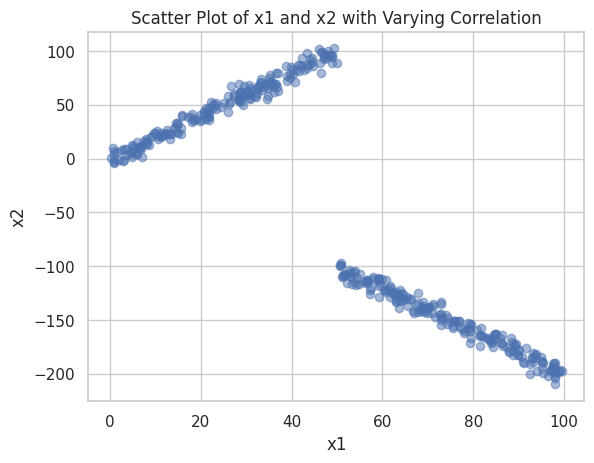

In [ ]:
x1 = df['x1']
x2 = df['x2']
# Plot the data
plt.scatter(x1, x2, alpha=0.5)
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Scatter Plot of x1 and x2 with Varying Correlation')
plt.show()

Correlation Coefficient (r-value): -0.8318


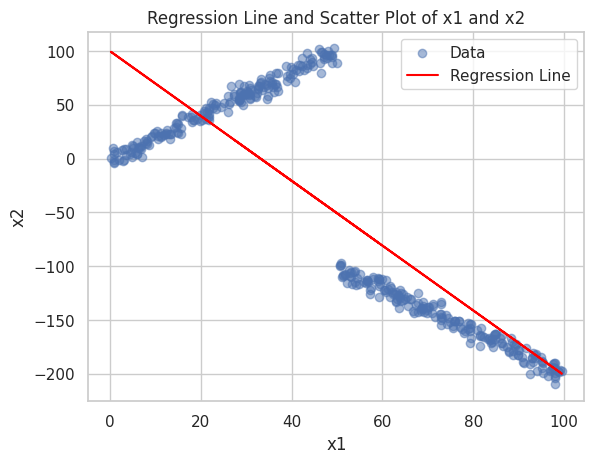

In [ ]:
from scipy.stats import linregress

# Fit a linear regression line
slope, intercept, r_value, p_value, std_err = linregress(x1, x2)

# Calculate the predicted values using the regression line
predicted_x2 = slope * x1 + intercept

# Plot the data points and the regression line
plt.scatter(x1, x2, alpha=0.5, label='Data')
plt.plot(x1, predicted_x2, color='red', label='Regression Line')
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Regression Line and Scatter Plot of x1 and x2')
plt.legend()

# Calculate and print the correlation coefficient (r-value)
print(f'Correlation Coefficient (r-value): {r_value:.4f}')

# Show the plot
plt.show()


Correlation coefficient suggests a strong negative correlation (1)

Looking at the scatter plot and regression line, we see that there is in fact two clusters, one with positive correlation and one with negative correlation. Looking at only the correlation coefficient is therefore subject to misinterpretation of the distribution (2)